In [3]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os,sys
from scipy import ndimage, misc
from helpers import *
import skimage.transform as st
import cv2 as cv
import imageio
from PIL import Image

In [4]:
# Loaded a set of images
root_dir = "training/"
image_dir = root_dir + "images/"
files = os.listdir(image_dir)
n = 100 # 100 images

print("Loading " + str(n) + " images")
imgs = [load_image(image_dir + files[i]) for i in range(n)]
print(files[0])

gt_dir = root_dir + "groundtruth/"
print("Loading " + str(n) + " images")
gt_imgs = [load_image(gt_dir + files[i]) for i in range(n)]

Loading 100 images
satImage_009.png
Loading 100 images


In [5]:
def rgba2rgb( rgba, background=(255,255,255) ):
    row, col, ch = rgba.shape

    if ch == 3:
        return rgba

    assert ch == 4, 'RGBA image has 4 channels.'

    rgb = np.zeros( (row, col, 3), dtype='float32' )
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]

    a = np.asarray( a, dtype='float32' ) / 255.0

    R, G, B = background

    rgb[:,:,0] = r * a + (1.0 - a) * R
    rgb[:,:,1] = g * a + (1.0 - a) * G
    rgb[:,:,2] = b * a + (1.0 - a) * B

    return np.asarray( rgb, dtype='uint8' )

In [8]:
dim=(400,400) # images should have 400x400 pixels
j=0
for i in range(100):
    for angle in (15,30,45,60,90,100,180,270):
        img = imgs[i]
        img_gt = gt_imgs[i]
        
        #image
        img_changed = ndimage.rotate(img, angle, reshape=True,mode='mirror') #rotate image
        img_final = cv.resize(img_changed, dim, interpolation = cv.INTER_AREA) #resize to 400x400
        
        #groundtruth
        gt_img_changed = ndimage.rotate(img_gt, angle, reshape=True,mode='mirror') #rotate groundtruth
        gt_img_final = cv.resize(gt_img_changed, dim, interpolation = cv.INTER_AREA) #resize
        ret,gt_img_final = cv.threshold(gt_img_final,0.2,1,cv.THRESH_BINARY)
        
        img_final=img_float_to_uint8(img_final)
        gt_img_final=img_float_to_uint8(gt_img_final)
        
        imageio.imwrite('training/images/satImage_{}.png'.format(j+101),img_final)        
        #plt.imsave('training/groundtruth/satImage_{}.png'.format(j+101), gt_img_final, cmap='Greys_r')
        
        # update for right name of images
        j+=1

In [9]:
# Loaded a set of images
root_dir = "training/"
image_dir = root_dir + "images/"
files = os.listdir(image_dir)
n = 900 # 100 images

print("Loading " + str(n) + " images")
imgs = [load_image(image_dir + files[i]) for i in range(n)]
print(files[0])

gt_dir = root_dir + "groundtruth/"
print("Loading " + str(n) + " images")
gt_imgs = [load_image(gt_dir + files[i]) for i in range(n)]

Loading 900 images
satImage_666.png
Loading 900 images


(400, 400, 4)
(400, 400)


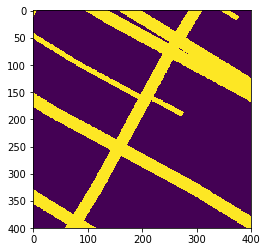

In [29]:
print(gt_imgs[3].shape)
result = gt_imgs[3][:, :, 0]
print(result.shape)
#plt.imshow(result)
gray = cv.cvtColor(gt_imgs[3], cv.COLOR_BGR2GRAY)
plt.imshow(gray)

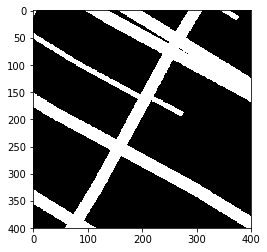

In [26]:
plt.imshow(gt_imgs[3])